## ML II Individual Assignment

## 1. Loading Data

In [180]:
from dataframe import Dataframe
from dataset import Dataset
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'Dataframe' from 'dataframe' (/opt/anaconda3/lib/python3.7/site-packages/dataframe/__init__.py)

### 1.2 View Data

In [162]:
TurnoverDF = pd.read_csv('turnover.csv')
column_names = TurnoverDF.columns.tolist()
print(column_names)
TurnoverDF.head()

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Data Transformation

### 2.1 Changing Column Names

In [163]:
TurnoverDF=TurnoverDF.rename(columns = {'sales':'department'})

TurnoverDF.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2.2 Aggregating Department Types

In [164]:
import numpy as np

TurnoverDF['department']=np.where(TurnoverDF['department'] =='support', 'technical', TurnoverDF['department'])

TurnoverDF['department']=np.where(TurnoverDF['department'] =='IT', 'technical', TurnoverDF['department'])

TurnoverDF['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

### 2.3 Check Nulls

In [165]:
import numpy as np
TurnoverDF.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### 2.4 Data Exploration

In [166]:
TurnoverDF['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [167]:
TurnoverDF.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [168]:
TurnoverDF.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [169]:
TurnoverDF.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [170]:
import matplotlib.pyplot as plt

Text(0.5, -41.75, 'Department')

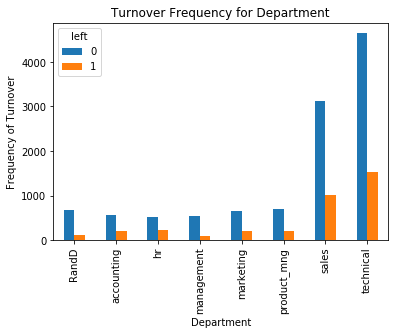

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt

pd.crosstab(TurnoverDF.department,TurnoverDF.left).plot(kind='bar')
plt.ylabel('Frequency of Turnover')
plt.savefig('division_bar_chart')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')

Text(0.5, -16.0, 'Salary Level')

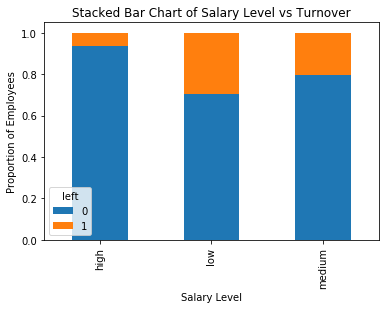

In [173]:
table=pd.crosstab(TurnoverDF.salary, TurnoverDF.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')

### 2.5 Creating Dummy Variables 

In [108]:
categorical=['department','salary']
for var in categorical:
    categorical_var_list='var'+'_'+ var
    categorical_var_list = pd.get_dummies(TurnoverDF[var], prefix=var)
    TO1= TurnoverDF.join(categorical_var_list)
    TurnoverDF=TO1

In [109]:
TurnoverDF.drop(TurnoverDF.columns[[8, 9]], axis=1, inplace=True)

TurnoverDF.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Feature Engineering Selection, Splitting and Scaling Data

In [131]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from dataframe import DataFrame

In [141]:
Turnover_vars=TurnoverDF.columns.values.tolist()
y=['left']
X=[i for i in Turnover_vars if i not in y]

In [144]:
y.corrwith(x) 

AttributeError: 'list' object has no attribute 'corrwith'

In [154]:

from dataset import Dataset

TurnoverDF.correlated(threshold= 0.3)

AttributeError: 'DataFrame' object has no attribute 'correlation_ratio'

In [175]:

from dataframe import Dataframe

TurnoverDF.scale(method= "MinMaxScalar")

ImportError: cannot import name 'Dataframe' from 'dataframe' (/opt/anaconda3/lib/python3.7/site-packages/dataframe/__init__.py)

In [153]:
TurnoverDF.skewed_features()

AttributeError: 'DataFrame' object has no attribute 'skewed_features'

In [135]:
TurnoverDF.fix_skewness()

AttributeError: 'DataFrame' object has no attribute 'fix_skewness'

In [122]:
TurnoverDF.outliers()
TurnoverDF.drop_samples(TurnoverDF.outliers())

AttributeError: 'DataFrame' object has no attribute 'outliers'

### Set Target Variable and Feature Selection 

In [155]:
Turnover_vars=TurnoverDF.columns.values.tolist()
y=['left']
X=[i for i in Turnover_vars if i not in y]

In [156]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(TurnoverDF[X], TurnoverDF[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [157]:
sig_cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=TurnoverDF[sig_cols]
y=TurnoverDF['left']

## Logistic Regression Model 

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

TurnoverDF.fit(X_train, y_train)

#Predict with testing set
y_pred = TurnoverDF.predict(X_test)

#Extract feature importances
importances = TurnoverDF.feature_importances_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

In [181]:
# dataframe: a data-frame implementation using method piping
#
# Copyright (C) 2016 Simon Dirmeier
#
# This file is part of dataframe.
#
# dataframe is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# dataframe is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with dataframe. If not, see <http://www.gnu.org/licenses/>.
#
#
# @author = 'Simon Dirmeier'
# @email = 'mail@simon-dirmeier.net'


import dataframe
from ._dataframe_abstract import ADataFrame
from ._dataframe_column_set import DataFrameColumnSet
from ._check import is_none, is_callable, has_elements
from ._piping_exception import PipingException


class DataFrame(ADataFrame):
    """
    The base DataFrame class.

    """

    def __init__(self, **kwargs):
        """
        Constructor for DataFrame.

        :param kwargs: standard named vargs argument, i.e. list of named lists
        :type kwargs: list of named lists
        :return: returns a new DataFrame object
        :rtype: DataFrame
        """
        self.__data_columns = DataFrameColumnSet(**kwargs)

    def __iter__(self):
        """
        Iterator implementation for DataFrame.
        Every iteration yields one row of the DataFrame.

        :return: returns a row from the DataFrame
        :rtype: DataFrameRow
        """
        for i in range(self.nrow):
            yield self.__row(i)

    def __getitem__(self, item):
        """
        Getter method for DataFrame. Returns the column with name item.

        :param item: the name of a column
        :type item: str
        :return: returns a column from the DataFrame
        :rtype: DataFrameColumn
        """

        if isinstance(item, str) and item in self.colnames:
            return self.__data_columns[self.colnames.index(item)]
        elif isinstance(item, int):
            return self.__row(item)
        elif isinstance(item, slice):
            return self.__rows(list(range(*item.indices(self.nrow))))
        elif isinstance(item, tuple):
            return self.__rows(list(item))
        elif isinstance(item, list):
            return self.__rows(item)
        return None

    def __repr__(self):
        """
        String representation of DataFrame when print is called.

        :return: returns the string representation
        :rtype: str
        """
        return self.__str__()

    def __str__(self):
        """
        ToString method for DataFrame.

        :return: returns the string representation
        :rtype: str
        """
        return self.__data_columns.__str__()

    def __rrshift__(self, other):
        raise PipingException("")

    def aggregate(self, clazz, new_col, *args):
        """
        Aggregate the rows of the DataFrame into a single value.

        :param clazz: name of a class that extends class Callable
        :type clazz: class
        :param new_col: name of the new column
        :type new_col: str
        :param args: list of column names of the object that function 
        should be applied to
        :type args: tuple
        :return: returns a new dataframe object with the aggregated value
        :rtype: DataFrame
        """
        if is_callable(clazz) and not is_none(new_col) and has_elements(*args):
            return self.__do_aggregate(clazz, new_col, *args)

    def __do_aggregate(self, clazz, new_col, *col_names):
        # get columns
        colvals = [self[x] for x in col_names]
        if colvals is None:
            return None
        # instantiate class and call
        res = [clazz()(*colvals)]
        if len(res) != 1:
            raise ValueError("The function you provided " +
                             "yields an array of false length!")
        return DataFrame(**{new_col: res})

    def subset(self, *args):
        """
        Subset only some of the columns of the DataFrame.

        :param args: list of column names of the object that should be subsetted
        :type args: tuple
        :return: returns dataframe with only the columns you selected
        :rtype: DataFrame
        """
        cols = {}
        for k in self.colnames:
            if k in args:
                cols[str(k)] = \
                    self.__data_columns[self.colnames.index(k)].values
        return DataFrame(**cols)

    def group(self, *args):
        """
        Group the dataframe into row-subsets.

        :param args: list of column names taht should be used for grouping
        :type args: tuple
        :return: returns a dataframe that has grouping information
        :rtype: GroupedDataFrame
        """
        return dataframe.GroupedDataFrame(self, *args)

    def modify(self, clazz, new_col, *args):
        """
        Modify some columns (i.e. apply a function) and add the
        result to the table.

        :param clazz: name of a class that extends class Callable
        :type clazz: class
        :param new_col: name of the new column
        :type new_col: str
        :param args: list of column names of the object that
        function should be applied to
        :type args: tuple
        :return: returns a new dataframe object with the modiefied values,
         i.e. the new column
        :rtype: DataFrame
        """
        if is_callable(clazz) and not is_none(new_col) and has_elements(*args):
            return self.__do_modify(clazz, new_col, *args)

    def __do_modify(self, clazz, new_col, *col_names):
        colvals = [self[x] for x in col_names]
        if colvals is None:
            return None
        # instantiate class and call
        res = clazz()(*colvals)
        res = [res] if not isinstance(res, list) else res
        if len(res) != len(colvals[0].values):
            raise ValueError("The function you provided " +
                             "yields an array of false length!")
        cols = {column.colname: column.values for column in self.__data_columns}
        cols[new_col] = res
        return DataFrame(**cols)

    @property
    def nrow(self):
        """
        Getter for the number of rows in the DataFrame.

        :return: returns the number of rows
        :rtype: int
        """
        return self.__data_columns.nrow

    @property
    def ncol(self):
        """
        Getter for the number of columns in the DataFrame.

        :return: returns the number of columns
        :rtype: int
        """
        return self.__data_columns.ncol

    @property
    def colnames(self):
        """
        Getter for the columns names of the DataFrame.

        :return: returns a list of column names
        :rtype: list(str)
        """
        return self.__data_columns.colnames

    def which_colnames(self, *args):
        """
        Computes the indexes of the columns in the DataFrame.

        :param args: list of column names
        :type args: tuple
        :return: returns a list of indexes
        :rtype: list(int)
        """
        return self.__data_columns.which_colnames(*args)

    def cbind(self, **kwargs):
        """
        Bind a column to the DataFrame.

        :param kwargs: named list of elements you want to add
        :type kwargs: keyword tuple
        :return: self
        :rtype: DataFrame
        """
        self.__data_columns.cbind(**kwargs)
        return self

    def __rows(self, idxs):
        return self.__data_columns.rows(idxs)

    def __row(self, idx):
        return self.__data_columns.row(idx)


ModuleNotFoundError: No module named '__main__._dataframe_abstract'; '__main__' is not a package